### Columns in the dataset

- `TripID`, `Date`, `From_Station`, `To_Station`, `Distance_km`, `Fare`, `Cost_per_passenger`, `Passengers`, `Ticket_Type`, `Remarks`

Note: our dataset contains:
- ~1% missing values in `Passengers` (NaN)
- ~1% 'NA' strings in `Ticket_Type`
- ~1% blank `Remarks` entries
- ~30% `From_Station` values with leading/trailing spaces and inconsistent casing (needs trimming)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load data set

In [ ]:
csv_path = r'C:\Users\Irshad Ansari\Desktop\Delhi_Metro_Project\delhi_metro_updated.csv'
df = pd.read_csv(csv_path)
df.head()

,TripID,Date,From_Station,To_Station,Distance_km,Fare,Cost_per_passenger,Passengers,Ticket_Type,Remarks
0,59771,2022-05-08,Inderlok,Kashmere Gate,12.94,77.99,18.27,13.0,Smart Card,maintenance
1,21363,2023-01-12,Model Town,Dilshad Garden,2.33,35.89,83.71,15.0,Tourist Card,maintenance
2,127325,2023-07-13,Kashmere Gate,Netaji Subhash Place,5.56,64.35,43.70,9.0,Single,off-peak
3,140510,2022-11-10,Chandni Chowk,Hauz Khas,4.02,144.13,14.98,27.0,NaN,maintenance
4,144298,2022-11-06,Rajiv Chowk,Kalkaji Mandir,9.66,104.96,83.84,23.0,Single,off-peak


In [ ]:
df.shape

(150000, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   TripID              150000 non-null  int64  
 1   Date                150000 non-null  object 
 2   From_Station        150000 non-null  object 
 3   To_Station          150000 non-null  object 
 4   Distance_km         150000 non-null  float64
 5   Fare                150000 non-null  float64
 6   Cost_per_passenger  150000 non-null  float64
 7   Passengers          148500 non-null  float64
 8   Ticket_Type         148500 non-null  object 
 9   Remarks             123743 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 11.4+ MB


Total Colums in Data set

In [ ]:
df.columns

Index(['TripID', 'Date', 'From_Station', 'To_Station', 'Distance_km', 'Fare',
       'Cost_per_passenger', 'Passengers', 'Ticket_Type', 'Remarks'],
      dtype='object')

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
print(df['Date'].dtype)
print(df['Date'].head())



datetime64[ns]
0   2022-05-08
1   2023-01-12
2   2023-07-13
3   2022-11-10
4   2022-11-06
Name: Date, dtype: datetime64[ns]


Check NaN String in ticke type, blank counts in Remarks and null counts in Passengers column


In [ ]:
print('\nNaN string in ticket type: ',df['Ticket_Type'].value_counts(dropna=False).head())
print('\nRemarks blanks count: ', (df['Remarks']== '').sum())
print('\nPassengers null count: ', df['Passengers'].isna().sum())


NaN string in ticket type:  Ticket_Type
Tourist Card    59193
Single          37341
Smart Card      37244
Return          14722
NaN              1500
Name: count, dtype: int64

Remarks blanks count:  0

Passengers null count:  1500


Remove White Space Column From_Station

In [ ]:
df['From_Station'] = df['From_Station'].astype(str).str.strip().str.title()
df['From_Station'].sample(8)

37569    Central Secretariat
60655              Hauz Khas
39834            Rajiv Chowk
32819         Dilshad Garden
54485            Mandi House
80694      Noida City Centre
8421             Laxmi Nagar
46885            Mandi House
Name: From_Station, dtype: object

In [ ]:
# Replace 'NA' string with actual NaN and then inspect
df['Ticket_Type'] = df['Ticket_Type'].replace('NA', np.nan)
print('Ticket_Type nulls:', df['Ticket_Type'].isna().sum())

Ticket_Type nulls: 1500


In [ ]:
# fill missing ticket types with the mode
# The mode is the number that appears most often.
mode_ticket = df['Ticket_Type'].mode(dropna=True)[0]
print('Mode ticket type:', mode_ticket)

df['Ticket_Type'] = df['Ticket_Type'].fillna(mode_ticket)

Mode ticket type: Tourist Card


Convert Balnk Remarks to "NaN"

In [ ]:
df['Remarks'] = df['Remarks'].replace('', np.nan)
print('Remarks nulls after conversion:', df['Remarks'].isna().sum())

Remarks nulls after conversion: 26257


Handle Missing passenger values

In [ ]:
# Example: impute with median passengers
median_pass = int(df['Passengers'].median(skipna=True))
print('Median passengers:', median_pass)

Median passengers: 20


We will replace null with median vlaue now

In [ ]:
df['Passengers'] = df['Passengers'].fillna(median_pass)

print('Passengers nulls after replacing:', df['Passengers'].isna().sum())

Passengers nulls after replacing: 0


Create a profit column

In [ ]:
df['Profit_per_passenger'] = df['Fare'] - df['Cost_per_passenger']
# Profit could be negative for subsidized trips -> keep as is
df['Profit'] = df['Profit_per_passenger'] * df['Passengers']

In [ ]:
#lets print individual column to see it clearly
print(df[['Fare','Cost_per_passenger','Passengers','Profit_per_passenger','Profit']].head())

# lets also check total profit
print('\nTotal profit across dataset:', df['Profit'].sum())

     Fare  Cost_per_passenger  Passengers  Profit_per_passenger   Profit
0   77.99               18.27        13.0                 59.72   776.36
1   35.89               83.71        15.0                -47.82  -717.30
2   64.35               43.70         9.0                 20.65   185.85
3  144.13               14.98        27.0                129.15  3487.05
4  104.96               83.84        23.0                 21.12   485.76

Total profit across dataset: 127941908.47999999


Save Cleaned dataset

In [ ]:
cleaned_path = 'delhi_metro_cleaned_Dataset.csv'
df.to_csv(cleaned_path, index=False)
print('Saved cleaned CSV to', cleaned_path)

Saved cleaned CSV to delhi_metro_cleaned_Dataset.csv


### # Ploting charts to Explore Data

1. Bar char: top 10 stations by number of trips(from station)

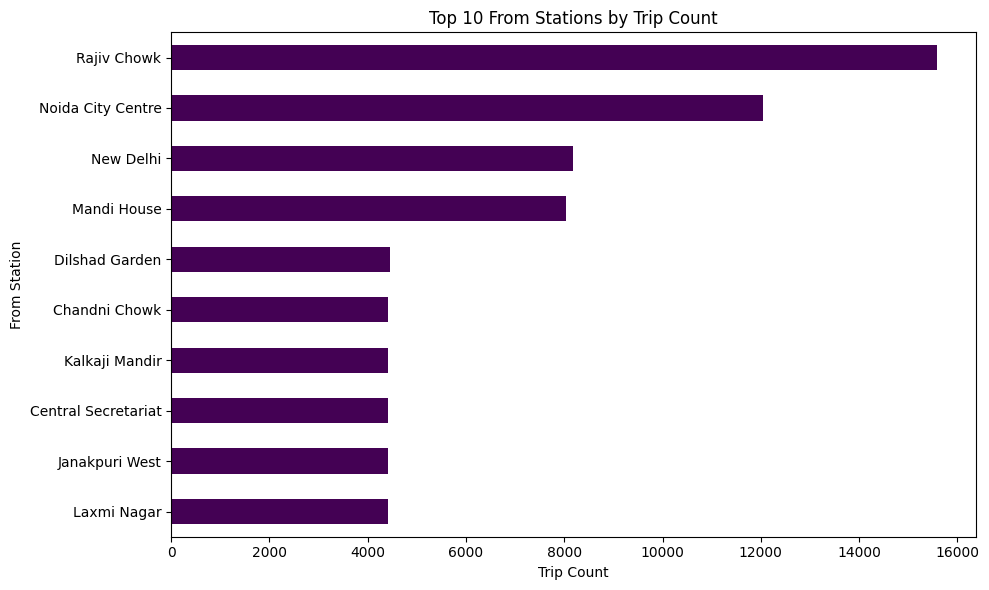

In [ ]:
plt.figure(figsize=(10,6))
station_counts = df['From_Station'].value_counts().nlargest(10)

station_counts.plot(kind='barh', cmap='viridis')
plt.title('Top 10 From Stations by Trip Count')
plt.xlabel('Trip Count')
plt.ylabel('From Station')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

Top 10 Busiest Stations (From + To Counts)

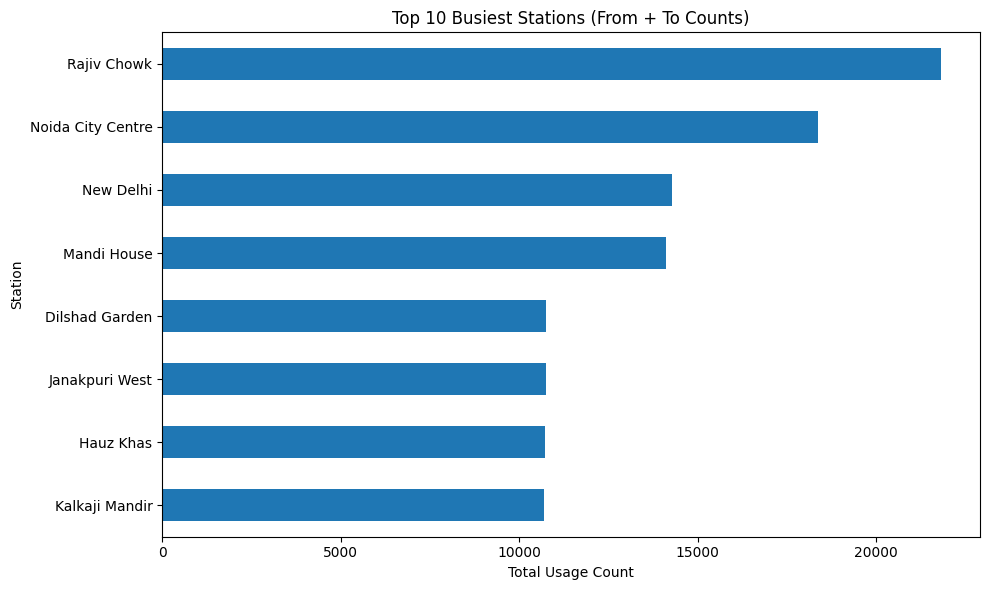

In [ ]:
plt.figure(figsize=(10,6))
total_station_counts = (df['From_Station'].value_counts() + df['To_Station'].value_counts()).nlargest(8)

total_station_counts.plot(kind='barh')
plt.title('Top 10 Busiest Stations (From + To Counts)')
plt.xlabel('Total Usage Count')
plt.ylabel('Station')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


Top 10 From Stations by % Trip Contribution

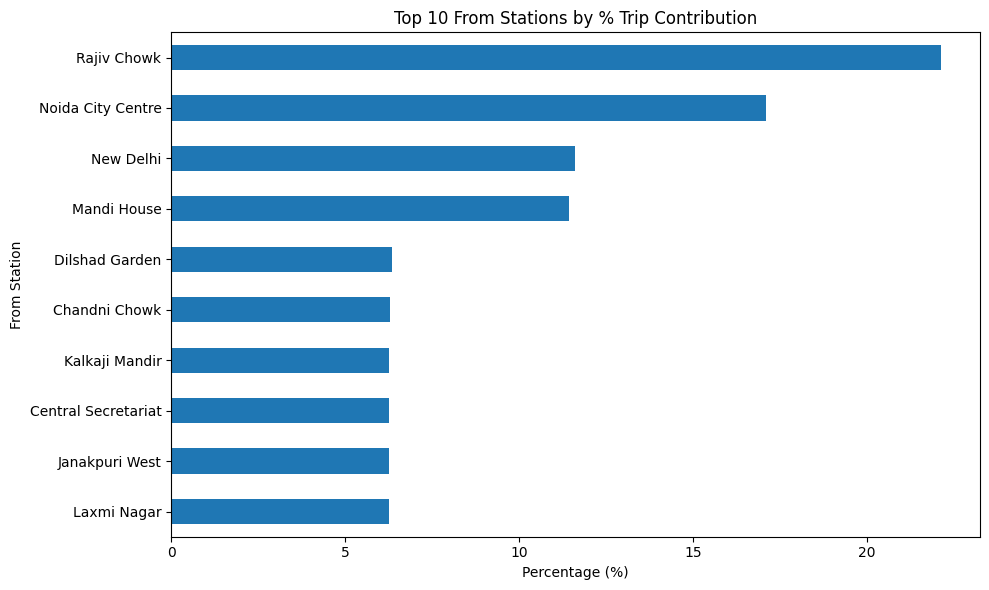

In [ ]:
plt.figure(figsize=(10,6))
station_counts = df['From_Station'].value_counts().nlargest(10)
station_pct = (station_counts / station_counts.sum()) * 100

station_pct.plot(kind='barh')
plt.title('Top 10 From Stations by % Trip Contribution')
plt.xlabel('Percentage (%)')
plt.ylabel('From Station')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


Fare Distribution Boxplot

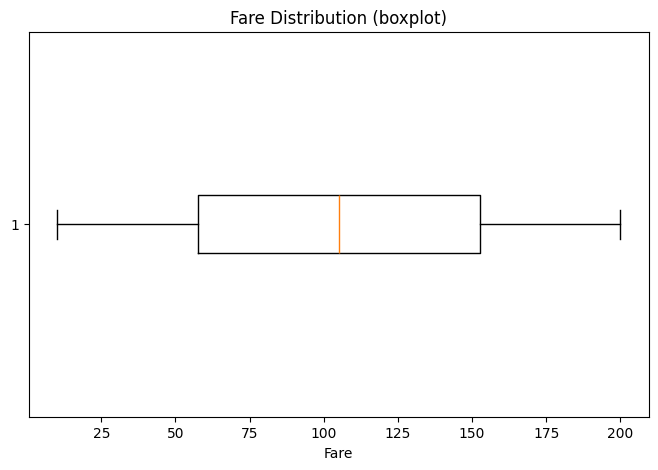

In [ ]:
plt.figure(figsize=(8,5))
plt.boxplot(df['Fare'].dropna(), vert=False)
plt.title('Fare Distribution (boxplot)')
plt.xlabel('Fare')
plt.show()

Distance vs Fare

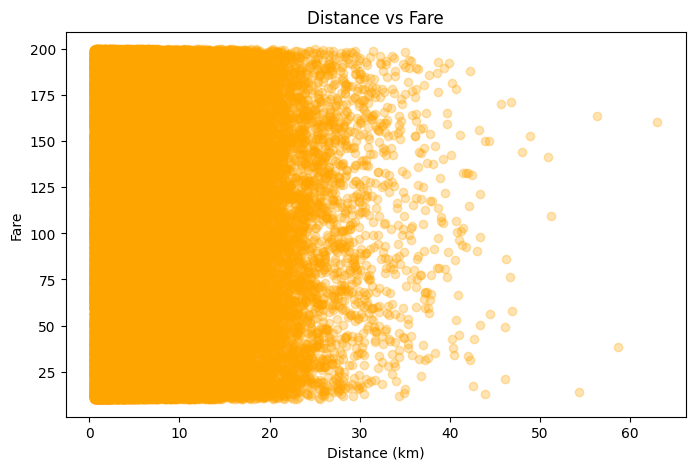

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(df['Distance_km'], df['Fare'],color='orange', alpha=0.3)
plt.title('Distance vs Fare')
plt.xlabel('Distance (km)')
plt.ylabel('Fare')
plt.show()

Ticket Type Share

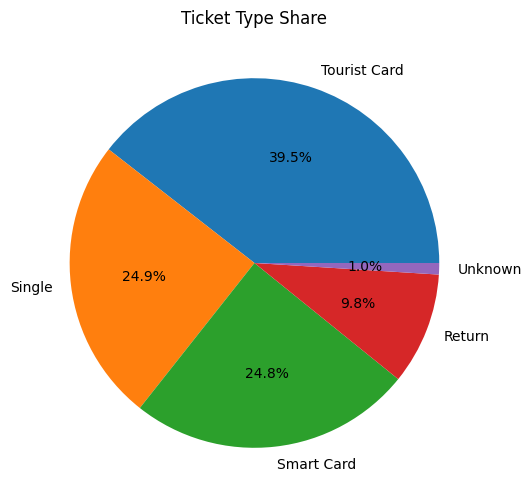

In [ ]:
plt.figure(figsize=(6,6))
tt = df['Ticket_Type'].fillna('Unknown').value_counts()
plt.pie(tt, labels=tt.index, autopct='%1.1f%%')
plt.title('Ticket Type Share')
plt.show()

Passengers Distribution

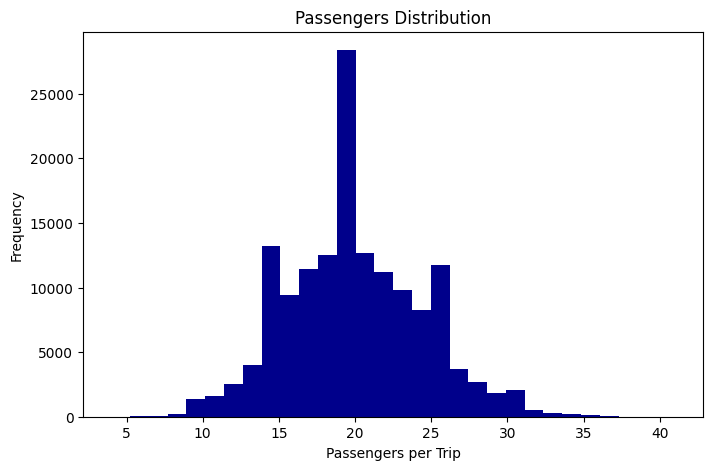

In [ ]:
plt.figure(figsize=(8,5))
plt.hist(df['Passengers'],color='darkblue', bins=30)
plt.title('Passengers Distribution')
plt.xlabel('Passengers per Trip')
plt.ylabel('Frequency')
plt.show()

7-day Rolling Average of Total Daily Profit

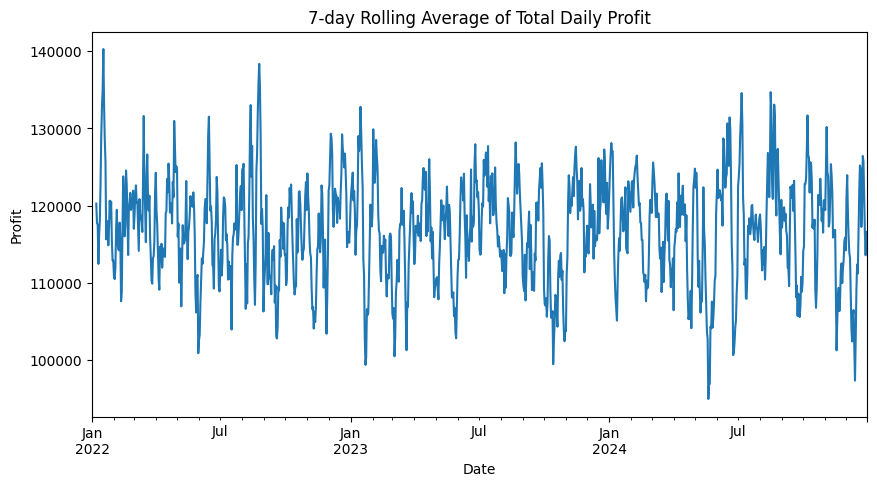

In [ ]:
plt.figure(figsize=(10,5))
df['Date'] = pd.to_datetime(df['Date'])
daily = df.groupby('Date')['Profit'].sum().sort_index()
daily.rolling(window=7).mean().plot()
plt.title('7-day Rolling Average of Total Daily Profit')
plt.xlabel('Date')
plt.ylabel('Profit')
plt.show()